## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

#Meu nome é Diego Haji Carvalho Campos.

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [0]:
#!pip install pandas=="0.24.0" --quiet
#!pip install seaborn=="0.9.0" --quiet
#!pip install scipy=="1.2.0" --quiet

In [145]:
import pandas as pd
import seaborn as sns
import scipy
import numpy as np
import scipy.stats as stats
import math

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.25.3
Usando seaborn 0.9.0
Usando scipy 1.4.1


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [0]:
# solução
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv')  

filmes.columns = ['filmesId','titulo','generos']
filmes.index = filmes.filmesId
#filmes.reset_index(drop=True, level = None)


In [147]:
filmes

,filmesId,titulo,generos
filmesId,,,
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,2,Jumanji (1995),Adventure|Children|Fantasy
3,3,Grumpier Old Men (1995),Comedy|Romance
4,4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
193581,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,193585,Flint (2017),Drama


In [148]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [149]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes

,filmesId,titulo,generos,ano_de_lancamento
filmesId,,,,
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,5,Father of the Bride Part II (1995),Comedy,1995.0
...,...,...,...,...
193581,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017.0
193583,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017.0
193585,193585,Flint (2017),Drama,2017.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [0]:
# solução
notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv')
notas.columns = ['usuarioId','filmeId','nota','momento']

In [151]:
notas

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [0]:
# solução
media_notas  = notas.groupby('filmeId').mean().nota
filmes['nota_media'] = media_notas

In [153]:
filmes

,filmesId,titulo,generos,ano_de_lancamento,nota_media
filmesId,,,,,
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429
...,...,...,...,...,...
193581,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017.0,4.000000
193583,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017.0,3.500000
193585,193585,Flint (2017),Drama,2017.0,3.500000


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [0]:
# solução para calcular o total de votos por filme
total_votos  = notas.groupby('filmeId').count()

In [155]:
# solução para criar a nova coluna e filtrar os filmes
filmes['total_de_votos'] = total_votos.nota

filmes = filmes.drop(filmes[filmes['total_de_votos'] < 50].index)

#filmes
nota_media_generos = filmes.groupby('generos').mean().nota_media
nota_media_generos

generos
Action|Adventure                              4.126964
Action|Adventure|Animation|Children|Comedy    3.836000
Action|Adventure|Children|Comedy|Fantasy      3.570175
Action|Adventure|Comedy                       3.366674
Action|Adventure|Comedy|Crime                 2.916058
                                                ...   
Musical|Romance                               3.937500
Mystery|Sci-Fi|Thriller                       3.879987
Mystery|Thriller                              4.119972
Sci-Fi|IMAX                                   3.993151
Thriller                                      3.992105
Name: nota_media, Length: 210, dtype: float64

In [156]:
filmes

,filmesId,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmesId,,,,,,
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0
...,...,...,...,...,...,...
109374,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,2014.0,3.778846,52.0
109487,109487,Interstellar (2014),Sci-Fi|IMAX,2014.0,3.993151,73.0
112852,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,2014.0,4.050847,59.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

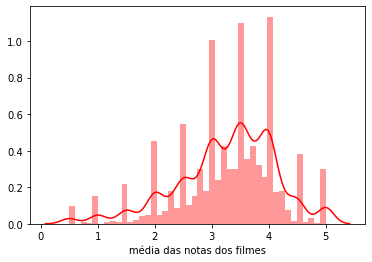

In [157]:
# solução histograma
import matplotlib.pyplot as plt

media_notas  = notas.groupby('filmeId').mean().nota
sns.distplot(a = media_notas,
             axlabel = 'média das notas dos filmes',
             color = 'red')


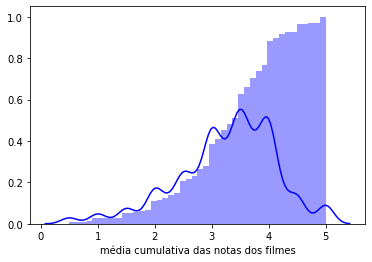

In [158]:
# solução cumulativa
media_notas  = notas.groupby('filmeId').mean().nota
sns.distplot(a = media_notas,
             axlabel = 'média cumulativa das notas dos filmes',
             color = 'blue',
             hist_kws = {'cumulative':True})

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

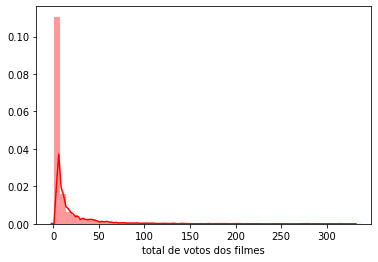

In [159]:
# solução histograma
total_votos  = notas.groupby('filmeId').count()

sns.distplot(a = total_votos.nota,
             axlabel = 'total de votos dos filmes',
             color = 'red')

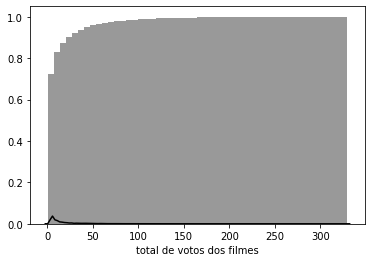

In [160]:
# solução cumulativa
total_votos  = notas.groupby('filmeId').count()
sns.distplot(a = total_votos.nota,
             axlabel = 'total de votos dos filmes',
             color = 'black',
             hist_kws = {'cumulative':True})

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [161]:
# solução
nota_limite_dos_20_porcento = filmes['nota_media'].quantile(0.8)
nota_limite_dos_20_porcento

3.992833035537026

In [162]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [163]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [164]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,filmesId,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmesId,,,,,,,,,,,,,,,,,,,,,,,,
1,1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

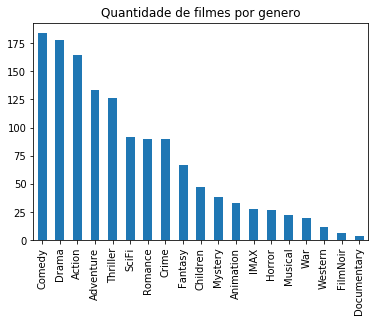

In [165]:
# solução
generos.sum().sort_values(ascending = False).plot(kind = 'bar',title = 'Quantidade de filmes por genero')


## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [0]:
# solução
top5_generos_em_quantidade_de_filmes = generos.sum().sort_values(ascending = False)
top5_generos_em_quantidade_de_filmes = top5_generos_em_quantidade_de_filmes.head()

In [167]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       184
Drama        178
Action       164
Adventure    133
Thriller     126
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [168]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,0.0,0.0,0.0,0.0,52.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.0,0.0,0.0,73.0,0.0,0.0,0.0
465,59.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0.0,0.0,0.0
466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,0.0


In [169]:
# solucão
votos_por_genero_por_filme.sum().sort_values(ascending = False)

Action         15734.0
Drama          15445.0
Comedy         15330.0
Adventure      13117.0
Thriller       11907.0
SciFi           8989.0
Crime           8649.0
Romance         7444.0
Fantasy         5993.0
Children        4331.0
Mystery         3452.0
Animation       3066.0
IMAX            2492.0
Horror          2215.0
War             2113.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary      108.0
dtype: float64

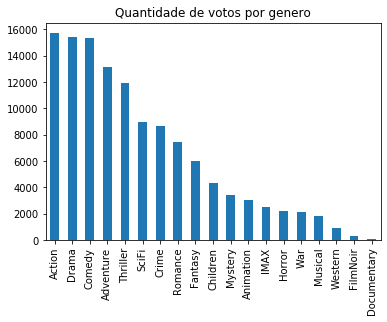

In [170]:
# solução
votos_por_genero_por_filme.sum().sort_values(ascending = False).plot(kind = 'bar',title = 'Quantidade de votos por genero')


## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [171]:
# solucao código
media_votos_quantidade = votos_por_genero_por_filme.sum().sort_values(ascending = False)/generos.sum().sort_values(ascending = False)
media_votos_quantidade 

Action          95.939024
Adventure       98.624060
Animation       92.909091
Children        92.148936
Comedy          83.315217
Crime           96.100000
Documentary     27.000000
Drama           86.769663
Fantasy         89.447761
FilmNoir        48.500000
Horror          82.037037
IMAX            89.000000
Musical         82.818182
Mystery         90.842105
Romance         82.711111
SciFi           97.706522
Thriller        94.500000
War            105.650000
Western         75.000000
dtype: float64

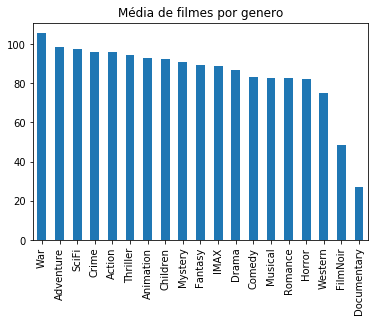

In [172]:
# solução com visualização 
media_votos_quantidade.sort_values(ascending = False).plot(kind = 'bar',title = 'Média de filmes por genero')


## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
São filmes relacionados, uma vez que filmes de guerra possuem ação, mas não necessariamente os filmes de ação possuem guerras.
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

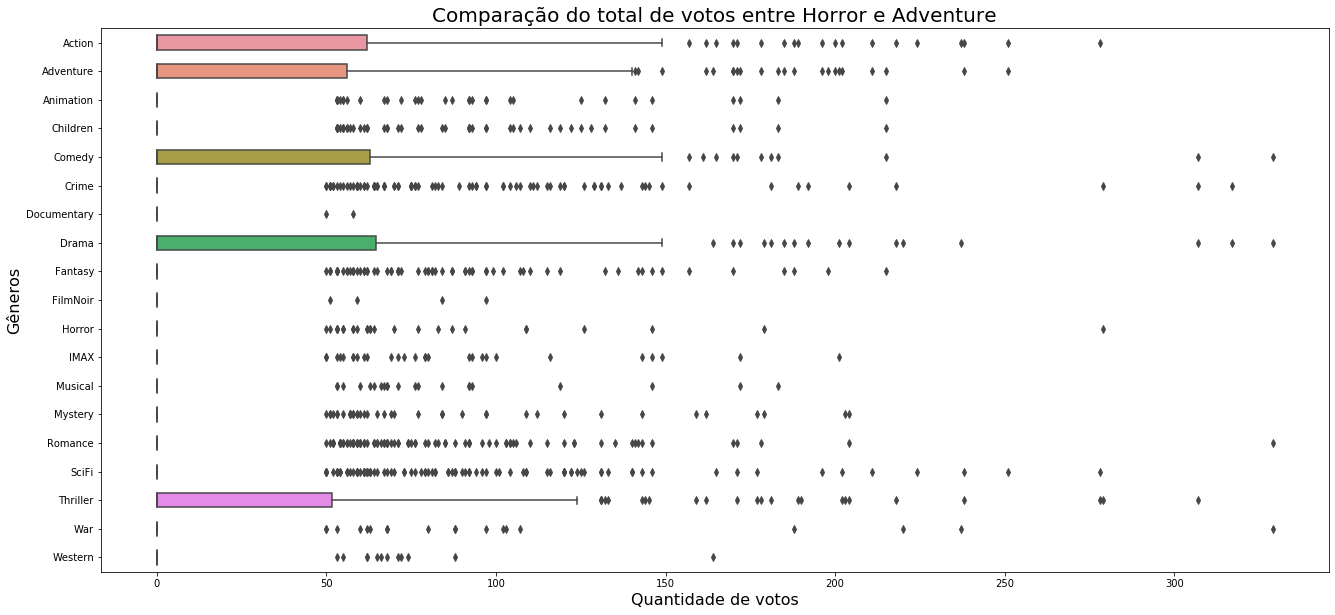

In [173]:
# solução:
ax = sns.boxplot(data = votos_por_genero_por_filme, orient= 'h', width= 0.5 )
ax.figure.set_size_inches(22,10)
ax.set_title('Comparação do total de votos entre Horror e Adventure', fontsize = 20)
ax.set_ylabel('Gêneros', fontsize = 16)
ax.set_xlabel('Quantidade de votos', fontsize = 16)
ax

#votos_por_genero_por_filme.

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

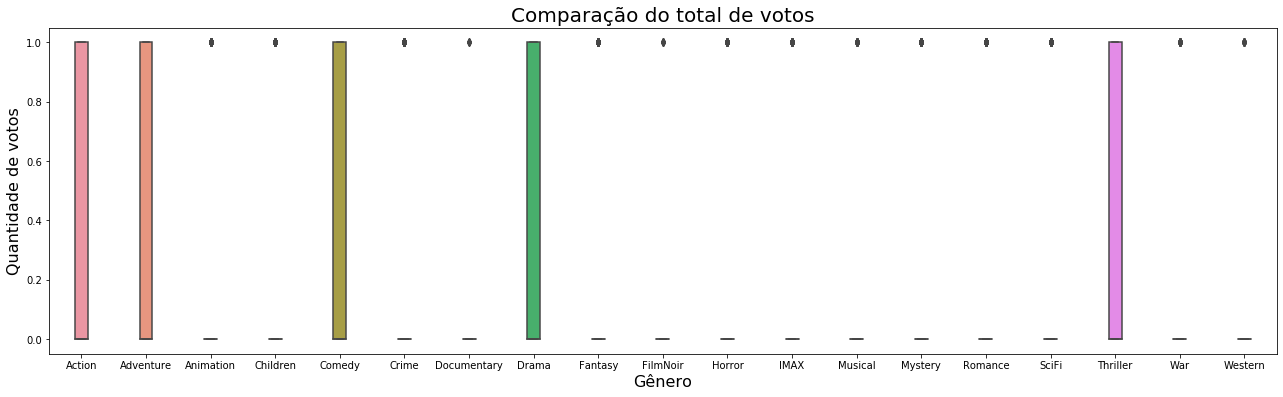

In [174]:
ax = sns.boxplot(data = generos, orient= 'v', width= 0.2 )
ax.figure.set_size_inches(22,6)
ax.set_title('Comparação do total de votos', fontsize = 20)
ax.set_ylabel('Quantidade de votos', fontsize = 16)
ax.set_xlabel('Gênero', fontsize = 16)
ax

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:
Adventure


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 1.0, 'Histograma')

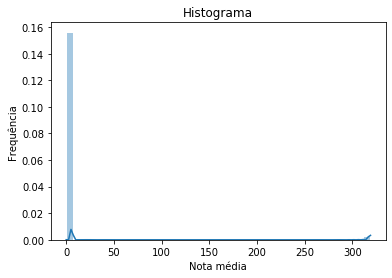

In [175]:
# solucao histograma de aventura

dados = votos_por_genero_por_filme.Adventure.value_counts()
ax = sns.distplot(dados)
ax.set(xlabel="Nota média", ylabel="Frequência")
ax.set_title("Histograma")

Text(0.5, 1.0, 'Histograma')

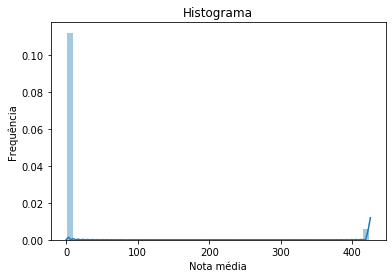

In [176]:
# solucao histograma de horror
dados = votos_por_genero_por_filme.Horror.value_counts()
ax = sns.distplot(dados)
ax.set(xlabel="Nota média", ylabel="Frequência")
ax.set_title("Histograma")

In [177]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

dadosH = votos_por_genero_por_filme.Horror.value_counts()
dadosA =  votos_por_genero_por_filme.Adventure.value_counts()
stats.ttest_ind(a = dadosH , b = dadosA, equal_var= False )


Ttest_indResult(statistic=0.7849160599602616, pvalue=0.44154573074487813)

In [178]:
# solução com o teste desejado
dadosH = votos_por_genero_por_filme.Horror.value_counts()
dadosA =  votos_por_genero_por_filme.Adventure.value_counts()
stats.ttest_ind(a = dadosA , b = dadosH, equal_var= False )

Ttest_indResult(statistic=-0.7849160599602616, pvalue=0.44154573074487813)

### Solução (explique sua conclusão):
Sim, pois há 44% de chance de que as pessoas que votaram em um filme votaram no outro.


## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

Text(0.5, 0, 'Gênero')

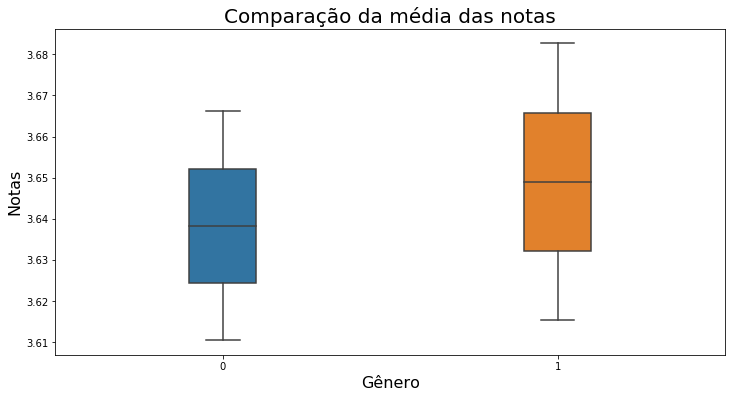

In [213]:
# solução:
dadosH = filmes.groupby(['Horror']).mean()
dadosA = filmes.groupby(['Adventure']).mean()
dados = [dadosH.nota_media, dadosA.nota_media]
ax = sns.boxplot(data = dados, orient= 'v', width= 0.2 )
ax.figure.set_size_inches(12,6)
ax.set_title('Comparação da média das notas', fontsize = 20)
ax.set_ylabel('Notas', fontsize = 16)
ax.set_xlabel('Gênero', fontsize = 16)


## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:
Adventure


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 1.0, 'Histograma')

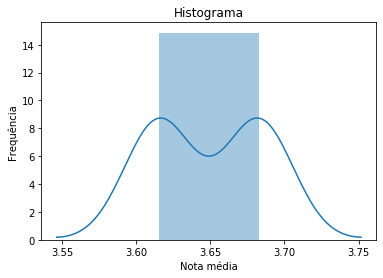

In [226]:
# solucao histograma de aventura
dadosA = filmes.groupby(['Adventure']).mean().nota_media
ax = sns.distplot(dadosA)
ax.set(xlabel="Nota média", ylabel="Frequência")
ax.set_title("Histograma")


Text(0.5, 1.0, 'Histograma')

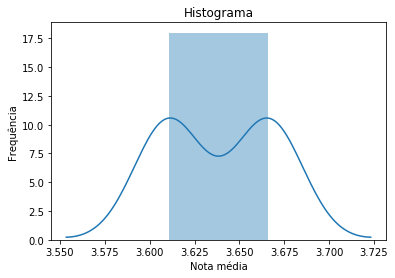

In [225]:
# solucao histograma de horror
dadosH = filmes.groupby(['Horror']).mean().nota_media
ax = sns.distplot(dadosH)
ax.set(xlabel="Nota média", ylabel="Frequência")
ax.set_title("Histograma")

In [227]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

dadosH = filmes.groupby(['Horror']).mean().nota_media
dadosA =  filmes.groupby(['Adventure']).mean().nota_media
stats.ttest_ind(a = dadosH , b = dadosA, equal_var= False )

Ttest_indResult(statistic=-0.24483662876646356, pvalue=0.8301253005782193)

In [228]:
# solução com o teste desejado
dadosH = filmes.groupby(['Horror']).mean().nota_media
dadosA =  filmes.groupby(['Adventure']).mean().nota_media
stats.ttest_ind(a = dadosH , b = dadosA, equal_var= False )

Ttest_indResult(statistic=-0.24483662876646356, pvalue=0.8301253005782193)

## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:
Sim, Adventure ainda possui a maior chance de sucesso

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:
Adventure


## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [250]:
# solução: calculando os 2 generos mais votados
print(votos_por_genero_por_filme.sum().sort_values(ascending = False).head(2))

Action    15734.0
Drama     15445.0
dtype: float64


In [251]:
# solução: encontrando os top 5 filmes desses generos
dados = filmes.nlargest(n = 5, columns=['Action', 'Drama','nota_media'])
dados

,filmesId,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmesId,,,,,,,,,,,,,,,,,,,,,,,,
2959,2959,Fight Club (1999),1999.0,4.272936,218.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
58559,58559,"Dark Knight, The (2008)",2008.0,4.238255,149.0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
1208,1208,Apocalypse Now (1979),1979.0,4.219626,107.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
6016,6016,City of God (Cidade de Deus) (2002),2002.0,4.146667,75.0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2028,2028,Saving Private Ryan (1998),1998.0,4.146277,188.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [253]:
# solucao
filmes.corr().round(4)
# Maior correlação: Drama, Crime
# Menor correlação: Sci-fi, Comedy

,filmesId,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmesId,1.0000,0.4165,0.1751,-0.2059,0.1086,0.1237,0.0417,0.0025,-0.0953,0.0205,0.0023,0.0441,0.0122,0.0101,-0.0465,0.4106,-0.0890,0.0728,-0.0787,0.0942,0.0024,0.0392,-0.0149
ano_de_lancamento,0.4165,1.0000,-0.1591,-0.0287,0.1713,0.1309,-0.0216,-0.1089,0.0560,0.0264,0.0444,-0.0261,-0.0503,-0.1229,-0.0282,0.2352,-0.2576,0.0247,-0.0125,0.0942,0.0620,-0.0002,-0.0443
nota_media,0.1751,-0.1591,1.0000,0.3426,-0.1541,-0.0800,0.0431,-0.0304,-0.2560,0.1902,-0.0035,0.2777,-0.0210,0.0818,-0.0339,0.0649,-0.0085,0.1299,-0.0720,-0.1367,-0.0168,0.1256,-0.0596
total_de_votos,-0.2059,-0.0287,0.3426,1.0000,0.0662,0.1044,0.0234,0.0018,-0.1285,0.0798,-0.0550,0.0188,-0.0100,-0.0394,-0.0361,-0.0163,-0.0247,-0.0071,-0.0454,0.0638,0.0855,0.0880,-0.0608
Action,0.1086,0.1713,-0.1541,0.0662,1.0000,0.3415,-0.1673,-0.2007,-0.2703,0.0621,-0.0682,-0.2618,-0.1084,-0.0439,-0.0089,0.1357,-0.1420,-0.0544,-0.1993,0.3354,0.3014,0.0662,0.0509
Adventure,0.1237,0.1309,-0.0800,0.1044,0.3415,1.0000,0.1595,0.1835,-0.0804,-0.2353,-0.0585,-0.2887,0.2429,-0.0718,-0.0950,0.2206,-0.0504,-0.0832,-0.1632,0.2844,-0.0086,-0.0863,0.0476
Animation,0.0417,-0.0216,0.0431,0.0234,-0.1673,0.1595,1.0000,0.7410,0.1200,-0.0920,0.0651,-0.1298,0.2210,-0.0314,-0.0682,0.1065,0.4120,-0.0513,0.0138,-0.0942,-0.1672,-0.0582,-0.0447
Children,0.0025,-0.1089,-0.0304,0.0018,-0.2007,0.1835,0.7410,1.0000,0.1240,-0.1270,-0.0310,-0.1300,0.3709,-0.0381,-0.0827,0.0956,0.3960,-0.0733,-0.0187,-0.0937,-0.2028,-0.0706,-0.0542
Comedy,-0.0953,0.0560,-0.2560,-0.1285,-0.2703,-0.0804,0.1200,0.1240,1.0000,-0.1264,-0.0272,-0.2972,0.0957,-0.0917,-0.0303,-0.1477,0.0486,-0.1912,0.2288,-0.2000,-0.3604,-0.0836,0.0078
Crime,0.0205,0.0264,0.1902,0.0798,0.0621,-0.2353,-0.0920,-0.1270,-0.1264,1.0000,-0.0453,0.0868,-0.1530,0.2335,-0.0510,-0.0317,-0.1084,0.1130,-0.2106,-0.1732,0.2539,-0.0763,-0.0792


## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [267]:
# solucao
filmes.corr().round(4)
# Maior correlação: Adventure, War
# Menor correlação: Comedy, Western

,filmesId,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmesId,1.0000,0.4165,0.1751,-0.2059,0.1086,0.1237,0.0417,0.0025,-0.0953,0.0205,0.0023,0.0441,0.0122,0.0101,-0.0465,0.4106,-0.0890,0.0728,-0.0787,0.0942,0.0024,0.0392,-0.0149
ano_de_lancamento,0.4165,1.0000,-0.1591,-0.0287,0.1713,0.1309,-0.0216,-0.1089,0.0560,0.0264,0.0444,-0.0261,-0.0503,-0.1229,-0.0282,0.2352,-0.2576,0.0247,-0.0125,0.0942,0.0620,-0.0002,-0.0443
nota_media,0.1751,-0.1591,1.0000,0.3426,-0.1541,-0.0800,0.0431,-0.0304,-0.2560,0.1902,-0.0035,0.2777,-0.0210,0.0818,-0.0339,0.0649,-0.0085,0.1299,-0.0720,-0.1367,-0.0168,0.1256,-0.0596
total_de_votos,-0.2059,-0.0287,0.3426,1.0000,0.0662,0.1044,0.0234,0.0018,-0.1285,0.0798,-0.0550,0.0188,-0.0100,-0.0394,-0.0361,-0.0163,-0.0247,-0.0071,-0.0454,0.0638,0.0855,0.0880,-0.0608
Action,0.1086,0.1713,-0.1541,0.0662,1.0000,0.3415,-0.1673,-0.2007,-0.2703,0.0621,-0.0682,-0.2618,-0.1084,-0.0439,-0.0089,0.1357,-0.1420,-0.0544,-0.1993,0.3354,0.3014,0.0662,0.0509
Adventure,0.1237,0.1309,-0.0800,0.1044,0.3415,1.0000,0.1595,0.1835,-0.0804,-0.2353,-0.0585,-0.2887,0.2429,-0.0718,-0.0950,0.2206,-0.0504,-0.0832,-0.1632,0.2844,-0.0086,-0.0863,0.0476
Animation,0.0417,-0.0216,0.0431,0.0234,-0.1673,0.1595,1.0000,0.7410,0.1200,-0.0920,0.0651,-0.1298,0.2210,-0.0314,-0.0682,0.1065,0.4120,-0.0513,0.0138,-0.0942,-0.1672,-0.0582,-0.0447
Children,0.0025,-0.1089,-0.0304,0.0018,-0.2007,0.1835,0.7410,1.0000,0.1240,-0.1270,-0.0310,-0.1300,0.3709,-0.0381,-0.0827,0.0956,0.3960,-0.0733,-0.0187,-0.0937,-0.2028,-0.0706,-0.0542
Comedy,-0.0953,0.0560,-0.2560,-0.1285,-0.2703,-0.0804,0.1200,0.1240,1.0000,-0.1264,-0.0272,-0.2972,0.0957,-0.0917,-0.0303,-0.1477,0.0486,-0.1912,0.2288,-0.2000,-0.3604,-0.0836,0.0078
Crime,0.0205,0.0264,0.1902,0.0798,0.0621,-0.2353,-0.0920,-0.1270,-0.1264,1.0000,-0.0453,0.0868,-0.1530,0.2335,-0.0510,-0.0317,-0.1084,0.1130,-0.2106,-0.1732,0.2539,-0.0763,-0.0792


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

Text(0.5, 0, 'Ano de lançamento')

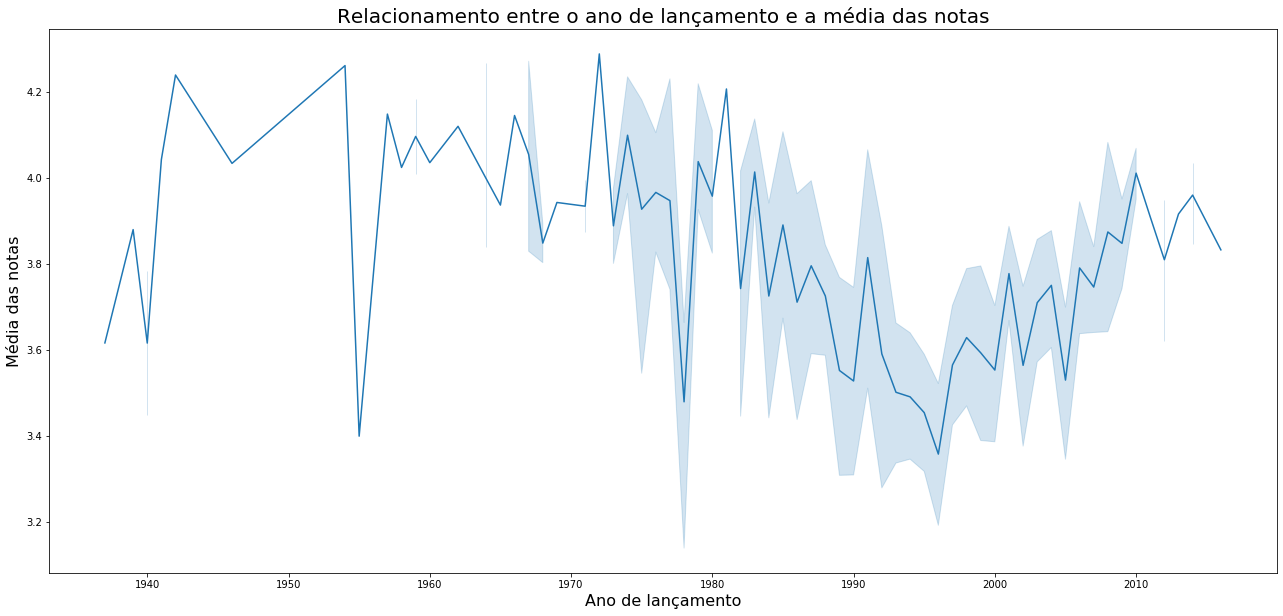

In [261]:
# solucao
ax = sns.lineplot(y = 'nota_media', x = 'ano_de_lancamento', data = filmes )
ax.figure.set_size_inches(22,10)
ax.set_title('Relacionamento entre o ano de lançamento e a média das notas', fontsize = 20)
ax.set_ylabel('Média das notas', fontsize = 16)
ax.set_xlabel('Ano de lançamento', fontsize = 16)


## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [268]:
# solução (código)
filmes.ano_de_lancamento.corr(filmes.nota_media).round(4)

-0.1591

### Solução (explicação)

Esse tipo de correlação pode influenciar como os outros dados são tradados, ignorando dados mais relevantes.

## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.05, 'Dispersão entre as variáveis')

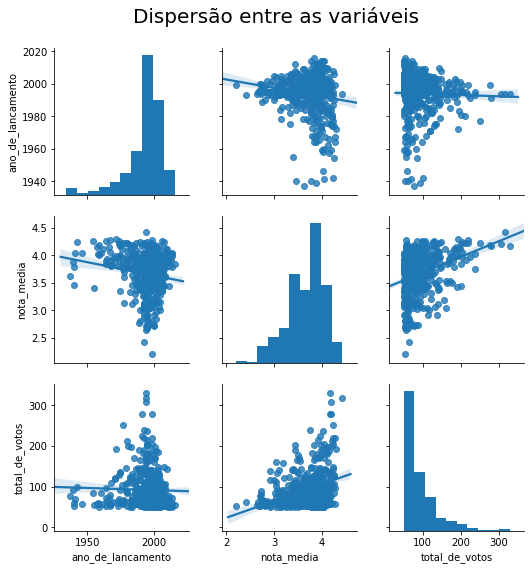

In [271]:
# solução
infos = filmes.filter(['ano_de_lancamento','nota_media','total_de_votos'], axis = 1)
ax = sns.pairplot(data = infos, kind= 'reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize = 20, y = 1.05)

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

Text(0.5, 1.05, 'Dispersão entre as variáveis')

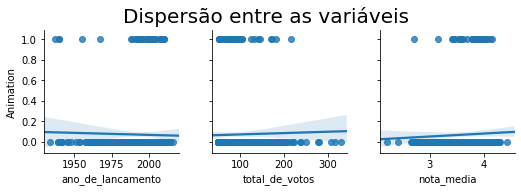

In [282]:
ax = sns.pairplot(data = filmes, y_vars= 'Animation', x_vars = ['ano_de_lancamento', 'total_de_votos', 'nota_media'], kind= 'reg', palette= 'husl')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize = 20, y = 1.05)

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:
Parece uma relação linear.
Parece que quanto mais recente, mais votos o filme possui.



## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário